# Midterm Project Milestone 2: Get the Data
Authors:
- Tyler Arista
- Ryan Brown
- David Barry

## Overview
- We are interested in the relationship between fastball speed and Tommy John surgery rates because there has been an increase in pitchers needing Tommy John surgery as fastball velocities have risen in the MLB. We chose to replicate a plot from this article.

- Original visualization:
  - [Link to view visualization](https://tht.fangraphs.com/velocitys-relationship-with-pitcher-arm-injuries/)

### What is Tommy John
- Tommy John surgery is a procedure to repair a torn ligament in the elbow, often needed by baseball players, especially pitchers, due to the stress of frequent throwing. The surgery involves replacing the damaged ligament with a tendon from another part of the body. It's become more common recently, especially among younger athletes, due to increased specialization in sports and overuse of their arms. While successful, it requires about a year of recovery time.

### Claim
- "The author is trying to show how the rise in fastball velocities is contributing to the increase in Tommy John surgeries among MLB pitchers."

## Design
- What overall type of visualziation was chosen? Why might the author have chosen it?
  - The original visualization uses a stacked bar chart to show the distribution of pitchers by their average fastball velocity over time. Each bar represents a year, and within each bar, the different colors represent the percentage of pitchers falling into various velocity ranges.
- What variables are being shown?
  - The plot compares two variables:
    - Year
    - Fastball velocity ranges
- What visual cues(aka retinal variables or aesthetics) were chosen to represent those data variables?
  - The visualization uses color to differentiate between the fastball velocity ranges. Each color represents a specific velocity range, allowing viewers to easily see how the distribution of pitchers in each range changes over time. The height of each colored section in the stacked bar indicates the percentage of pitchers in that velocity range for a given year.
- Overall, what about the visual makes it effective, or ineffective, for making its claim?
  - This visualization effectively communicates the shift in fastball velocities over time. It clearly shows the increasing percentage of pitchers throwing in the higher velocity ranges (e.g., 93-96 mph and >96 mph), which supports the argument that fastball speeds have increased over the years. The use of color and a stacked bar format makes it easy to compare the proportions across years. However, the design could be enhanced by showing other factors, such as pitch counts or injuries, to provide more context for how increasing fastball velocities relate to injuries like Tommy John surgery.

## Data

### Data Overview
- Whether you were able to find the original data (if not, why not?)
  - We were unable to locate the exact dataset used by the original article's author. However, we found a similar dataset on Kaggle that records data relevant to the topic. This dataset tracks MLB pitchers, including their fastball velocities, innings pitched, and whether they underwent Tommy John surgery. Although this data spans from 2015 to 2023 (a different time period than the original visualization), it still provides detailed information about pitchers’ mechanics and should not be too far off from the original data.
- Where the data came from
   - Direct URL and/or specific instructions for how to obtain it.
     - https://www.kaggle.com/datasets/brendanstyle/tommy-john-surgery-data
     - https://docs.google.com/spreadsheets/d/1gQujXQQGOVNaiuwSN680Hq-FDVsCwvN-3AazykOBON0/edit?gid=0#gid=0
   - Under what terms is the source allowing you to use the data?
     - The dataset is shared under Kaggle’s standard terms, which allow for free usage for educational and research purposes. However, it’s essential to give proper credit to the dataset creator and Kaggle for hosting it. There are no restrictions for non-commercial use, but for any other purposes (e.g., commercial analysis), it’s important to review Kaggle’s data-sharing agreements and terms.
   - Try to trace it upstream as close to the source as you can.
     - This dataset appears to be derived from official MLB statistics, which are likely aggregated and cleaned by the dataset creator before being uploaded to Kaggle. Although the specific details of the original MLB data sources are not provided, it is common for such data to be collected from publicly available game logs, pitch-tracking systems like MLB’s Statcast, or other sports data aggregators.
- What might we need to know about the data collection process in order to interpret the data correctly?
  - While this dataset seems to be based on official MLB statistics, it likely underwent some cleaning and aggregation before being uploaded to Kaggle. It includes various pitching metrics such as fastball velocities, release points, and pitch types, but it does not cover other important factors like training regimens, recovery times, or fatigue levels, which may also impact injury risk. This limitation means that, while useful, the dataset may not fully capture all the variables contributing to Tommy John surgery occurrences. Nonetheless, it serves as a valuable resource for analyzing trends in fastball velocities and their potential impact on injury rates.

### Data Details
#### Tommy John Surgery Data

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/kaggle/input/tommy-john-surgery-data/TJS_final_v3.csv')
data.head()

/kaggle/input/tommy-john-surgery-data/TJS_final_edit.xlsx
/kaggle/input/tommy-john-surgery-data/TJS_final_v3.csv
/kaggle/input/tommy-johnkaggle/TJS_final_v3.csv


,Name,FF_max_velo,FC_max_velo,SI_max_velo,mlbID,CH_release_extension,CH_release_pos_x,CH_release_pos_z,CH_release_speed,CH_release_spin_rate,...,SL_release_spin_rate,SL_release_extension_std,SL_release_pos_x_std,SL_release_pos_z_std,SL_pitch_type,SL_percentage,ff max-avg,fc max-avg,si max-avg,TJS
0,Jose Alvarado,100.9,99.1,102.5,621237,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.851220,6.237567,4.052184,0
1,Joe Kelly,102.2,NaN,102.2,523260,5.991487,-1.716572,5.510676,86.886477,2029.366587,...,2565.015330,0.309850,0.212514,0.221838,1170.0,13.423589,4.665185,NaN,4.854534,0
2,Noah Syndergaard,102.0,NaN,102.1,592789,6.795510,-0.980467,6.292723,90.230793,1702.073110,...,2107.099542,0.338026,0.302043,0.148507,1737.0,15.413968,3.990845,NaN,4.355506,1
3,Kelvin Herrera,102.0,94.8,101.8,516969,6.145517,-2.139328,5.777836,89.371185,1798.867903,...,2581.711364,0.296400,0.486245,0.151174,509.0,10.588725,4.372528,3.547059,4.947710,0
4,Javy Guerra,101.1,NaN,101.7,642770,6.309091,-1.767273,5.469091,91.872727,1741.636364,...,2414.692913,0.243906,0.310578,0.150372,257.0,22.803904,3.374449,NaN,3.848174,0


In [2]:
data.shape

(156, 69)

### Tommy John Surgery List(Using this dataset for surgery date)

In [3]:
injury_year_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTreAWR86oTU3Gy2OGL5iZE7KH2jGKZhBoRDkkva479S_wuRNPklPhBaAAoKb41gRTUKyU-Spau6PlT/pub?gid=0&single=true&output=csv')
injury_year_data.head()

,Donations,https://paypal.me/mlbplayeranalys?country.x=CA&locale.x=en_US,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,...,IP,K-BB%,ERA-,FIP-,G,GS,IP,K-BB%,ERA-,FIP-
1,Julian Aguiar,10/11/2024,CIN,MLB,P,R,United States,California,Cypress,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Joe Musgrove,10/11/2024,SD,MLB,P,R,United States,California,NaN,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Christian Scott,9/25/2024,NYM,MLB,P,R,United States,Florida,Florida,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brandon Williamson,9/1/2024,CIN,MLB,P,L,United States,Minnesota,Texas Christian,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
injury_year_data.columns = injury_year_data.iloc[0]
injury_year_data = injury_year_data.drop(injury_year_data.index[0])  # Drop the first row

injury_year_data.reset_index(drop=True, inplace=True)

injury_year_data.head()

,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,...,IP,K-BB%,ERA-,FIP-,G,GS,IP,K-BB%,ERA-,FIP-
0,Julian Aguiar,10/11/2024,CIN,MLB,P,R,United States,California,Cypress,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Joe Musgrove,10/11/2024,SD,MLB,P,R,United States,California,NaN,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Christian Scott,9/25/2024,NYM,MLB,P,R,United States,Florida,Florida,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brandon Williamson,9/1/2024,CIN,MLB,P,L,United States,Minnesota,Texas Christian,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chad Dallas,9/1/2024,TOR,AAA,P,R,United States,Texas,Tennessee,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
injury_year_data.shape

(2540, 42)

- A low-level description of the size and structure of the data.
  - The main dataset(data) contains 156 rows with 69 columns. Each row represents data for a specific MLB pitcher, including information about their pitch velocity, pitch type, release position, and whether they underwent Tommy John surgery. 
  - The Google Sheets dataset(injury_year_data) contains 2,540 rows and 42 columns. This dataset includes the surgery dates and more detailed personal information like player names, team, and surgery date.

- How many rows are there?
  - There are 156 rows of data for the main dataset(data)
  - The Google Sheets dataset has 2,540 rows(injury_year_data)
- What does a single row represent? (Translate the first observation in the dataset into an English sentence.)
  - In the main dataset, each row represents the pitching stats for a single MLB pitcher. For example, the first row shows Jose Alvarado with a fastball velocity of 100.9 mph.
  - In the Google Sheets dataset, each row contains a player's surgery date along with their team, level, and age at the time of surgery. For example, the first row shows Julian Aguiar, who had Tommy John surgery on 10/11/2024.
- What might be interesting to know about what information the data does, and doesntt, provide?
  - Does Provide
    - The main dataset offers detailed pitching metrics like fastball velocity, innings pitched, and whether the player had Tommy John surgery.
    - Pitch-specific data such as release points and spin rates, useful for analyzing pitching mechanics.
    - The Google Sheets data provides the actual surgery dates, which are necessary for analyzing trends over time.
  - Does NOT Provide
    - The main dataset does not include the year the data was recorded, which is essential for tracking trends over time. We used the surgery dates from the Google Sheets dataset to help fill this gap.
    - Information on other important factors like training regimens, rest periods, or injury history beyond Tommy John surgery is missing from both datasets.

## Data Wrangling
- Describe, at a broad level, what you need to do to the data to make it into the form you need for the plot. (e.g., what data types need fixing, whether you need to pivot, what filtering is needed, etc.)
- Add code blocks, with appropriate names, for wrangling steps. Explain the why for any choices you make (like filtering data).

### Handling Missing Values
- The dataset seems to have some missing values, especially for specific pitch types & velocity metrics. So we should handle missing values

In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

numeric_columns = data.select_dtypes(include=['number']).columns

data_filled = data.fillna(data[numeric_columns].mean())

threshold = len(data.columns) * 0.4
data_cleaned = data_filled.dropna(thresh=threshold)

data_cleaned.head()

Missing values in each column:
 Name              0
FF_max_velo       3
FC_max_velo      81
SI_max_velo      19
mlbID             0
                 ..
SL_percentage    23
ff max-avg        6
fc max-avg       87
si max-avg       31
TJS               0
Length: 69, dtype: int64


,Name,FF_max_velo,FC_max_velo,SI_max_velo,mlbID,CH_release_extension,CH_release_pos_x,CH_release_pos_z,CH_release_speed,CH_release_spin_rate,...,SL_release_spin_rate,SL_release_extension_std,SL_release_pos_x_std,SL_release_pos_z_std,SL_pitch_type,SL_percentage,ff max-avg,fc max-avg,si max-avg,TJS
0,Jose Alvarado,100.9,99.100,102.5,621237,6.224976,-1.083342,5.793456,85.878083,1797.120404,...,2357.258308,0.249704,0.269498,0.148752,866.992481,21.023514,2.851220,6.237567,4.052184,0
1,Joe Kelly,102.2,93.428,102.2,523260,5.991487,-1.716572,5.510676,86.886477,2029.366587,...,2565.015330,0.309850,0.212514,0.221838,1170.000000,13.423589,4.665185,3.960844,4.854534,0
2,Noah Syndergaard,102.0,93.428,102.1,592789,6.795510,-0.980467,6.292723,90.230793,1702.073110,...,2107.099542,0.338026,0.302043,0.148507,1737.000000,15.413968,3.990845,3.960844,4.355506,1
3,Kelvin Herrera,102.0,94.800,101.8,516969,6.145517,-2.139328,5.777836,89.371185,1798.867903,...,2581.711364,0.296400,0.486245,0.151174,509.000000,10.588725,4.372528,3.547059,4.947710,0
4,Javy Guerra,101.1,93.428,101.7,642770,6.309091,-1.767273,5.469091,91.872727,1741.636364,...,2414.692913,0.243906,0.310578,0.150372,257.000000,22.803904,3.374449,3.960844,3.848174,0


### Merge Tommy John Surgery Year Data
To include the year of Tommy John surgeries, we need to merge the cleaned dataset with more data, which contains player names and the surgery dates.

In [7]:
merged_data = pd.merge(data_cleaned, injury_year_data[['Player', 'TJ Surgery Date']], left_on='Name', right_on="Player", how='left')
merged_data.head()

,Name,FF_max_velo,FC_max_velo,SI_max_velo,mlbID,CH_release_extension,CH_release_pos_x,CH_release_pos_z,CH_release_speed,CH_release_spin_rate,...,SL_release_pos_x_std,SL_release_pos_z_std,SL_pitch_type,SL_percentage,ff max-avg,fc max-avg,si max-avg,TJS,Player,TJ Surgery Date
0,Jose Alvarado,100.9,99.100,102.5,621237,6.224976,-1.083342,5.793456,85.878083,1797.120404,...,0.269498,0.148752,866.992481,21.023514,2.851220,6.237567,4.052184,0,NaN,NaN
1,Joe Kelly,102.2,93.428,102.2,523260,5.991487,-1.716572,5.510676,86.886477,2029.366587,...,0.212514,0.221838,1170.000000,13.423589,4.665185,3.960844,4.854534,0,NaN,NaN
2,Noah Syndergaard,102.0,93.428,102.1,592789,6.795510,-0.980467,6.292723,90.230793,1702.073110,...,0.302043,0.148507,1737.000000,15.413968,3.990845,3.960844,4.355506,1,Noah Syndergaard,3/26/2020
3,Kelvin Herrera,102.0,94.800,101.8,516969,6.145517,-2.139328,5.777836,89.371185,1798.867903,...,0.486245,0.151174,509.000000,10.588725,4.372528,3.547059,4.947710,0,NaN,NaN
4,Javy Guerra,101.1,93.428,101.7,642770,6.309091,-1.767273,5.469091,91.872727,1741.636364,...,0.310578,0.150372,257.000000,22.803904,3.374449,3.960844,3.848174,0,Javy Guerra,1/1/2005


### Creating Fastball Velocity Groups
- To replicate the original plot, we need to group the pitchers into categories based on their average fastball velocity

In [8]:
# Create bins for fastball velocity categories
bins = [0, 87, 90, 93, 96, float('inf')]
labels = ['<87', '87 to 90', '90 to 93', '93 to 96', '>96']

# Apply the binning to the fastball velocity column
merged_data['Fastball_Category'] = pd.cut(merged_data['FF_max_velo'], bins=bins, labels=labels)

merged_data[['FF_max_velo', 'Fastball_Category']].head()


,FF_max_velo,Fastball_Category
0,100.9,>96
1,102.2,>96
2,102.0,>96
3,102.0,>96
4,101.1,>96


### Grouping Data by Year & Velocity Group
- After the surgery years are merged, we can group the data by year and fastball velocity group to calculate the percentage of pitchers in each velocity category.

In [9]:
# Extract the year from the surgery date
merged_data['Surgery_Year'] = pd.to_datetime(merged_data['TJ Surgery Date'], errors='coerce').dt.year

# Group the data by surgery year and fastball velocity category
grouped_data = merged_data.groupby(['Surgery_Year', 'Fastball_Category'], observed=False).size().unstack(fill_value=0)

grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

grouped_percentage.head()

Fastball_Category,<87,87 to 90,90 to 93,93 to 96,>96
Surgery_Year,,,,,
2003.0,0.0,0.0,0.0,0.0,100.0
2004.0,0.0,0.0,0.0,50.0,50.0
2005.0,0.0,0.0,0.0,0.0,100.0
2009.0,0.0,0.0,0.0,100.0,0.0
2010.0,0.0,0.0,0.0,0.0,100.0


### Filtering Irrelevant Data
- There may be data that is not relevant to our specific visualization (e.g., pitchers who did not pitch fastballs, years that are out of the desired range).

In [10]:
# Filter out rows where fastball velocity is missing or invalid, and where surgery year is outside the desired range
filtered_data = merged_data[(merged_data['FF_max_velo'] > 0) & (merged_data['Surgery_Year'] >= 2015)]
filtered_data.head()

,Name,FF_max_velo,FC_max_velo,SI_max_velo,mlbID,CH_release_extension,CH_release_pos_x,CH_release_pos_z,CH_release_speed,CH_release_spin_rate,...,SL_pitch_type,SL_percentage,ff max-avg,fc max-avg,si max-avg,TJS,Player,TJ Surgery Date,Fastball_Category,Surgery_Year
2,Noah Syndergaard,102.0,93.428,102.1,592789,6.795510,-0.980467,6.292723,90.230793,1702.073110,...,1737.0,15.413968,3.990845,3.960844,4.355506,1,Noah Syndergaard,3/26/2020,>96,2020.0
5,Trevor Rosenthal,101.7,93.428,101.4,572096,5.936908,-0.684209,6.044672,88.005596,1625.658291,...,239.0,8.472173,3.450823,3.960844,3.688642,1,Trevor Rosenthal,6/1/2023,>96,2023.0
6,Trevor Rosenthal,101.7,93.428,101.4,572096,5.936908,-0.684209,6.044672,88.005596,1625.658291,...,239.0,8.472173,3.450823,3.960844,3.688642,1,Trevor Rosenthal,8/30/2017,>96,2017.0
7,Jason Foley,100.8,93.428,101.3,671345,6.718100,-2.113258,5.477692,90.843439,1616.737557,...,513.0,19.602598,4.339583,3.960844,4.572319,0,Jason Foley,7/1/2017,>96,2017.0
9,Sandy Alcantara,101.5,93.428,101.1,645261,6.004244,-2.121168,6.023301,91.159063,1993.348202,...,2952.0,21.806900,4.343287,3.960844,4.134667,1,Sandy Alcantara,10/6/2023,>96,2023.0


## Replication

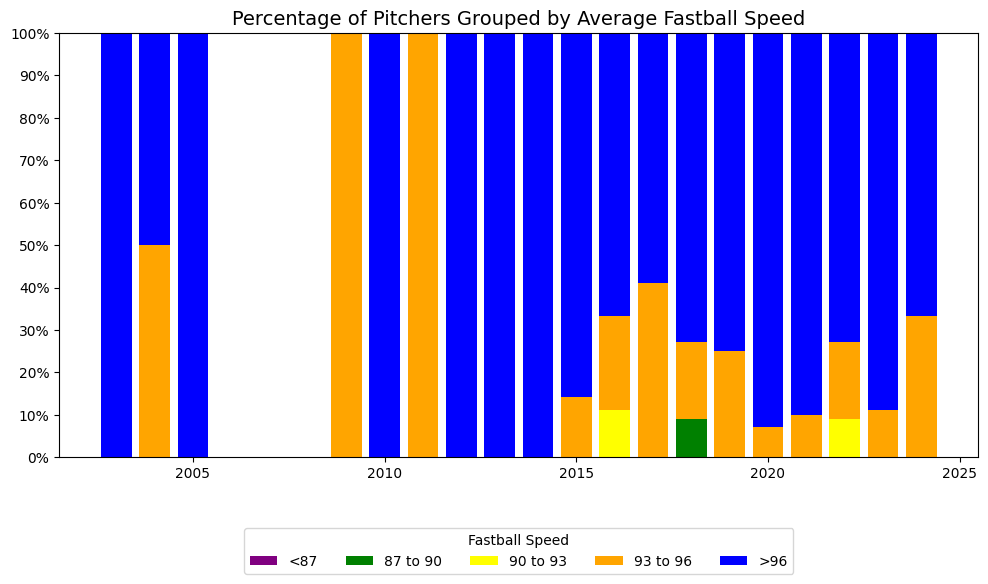

In [11]:
import matplotlib.pyplot as plt

years = grouped_percentage.index.astype(int)
categories = grouped_percentage.columns 

fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(years))
colors = ['purple', 'green', 'yellow', 'orange', 'blue']

for i, category in enumerate(categories):
    ax.bar(years, grouped_percentage[category], bottom=bottom, label=category, color=colors[i])
    bottom += grouped_percentage[category]

ax.set_title('Percentage of Pitchers Grouped by Average Fastball Speed', fontsize=14)

ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([f'{int(x)}%' for x in np.arange(0, 101, 10)])

ax.legend(title="Fastball Speed", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
plt.show()

Difficulties Encountered:
- Merging Dataset:
  - One challenge we faced was merging the original dataset with the dataset that had the Tommy John surgery dates. This required us to make sure the player names matched between the two datasets. In some cases, names didn’t match exactly, which caused some missing data after the merge. We resolved most of this by cleaning the column headers and making sure the names were aligned, but there are still a few players that may not have matched perfectly.
- Missing Year Data:
  - The original dataset didn’t have the years when the data was recorded. To overcome this, we used the surgery dates from another dataset and extracted the year from those dates. While this works for pitchers who had Tommy John surgery, it doesn't work for those who didn’t, so we’re still missing some year data for those pitchers.
  
Remaining Challenges:
- Some small differences in the exact appearance of the graph (like colors and spacing) still exist, but the essential structure is there. We are satisfied with the result since it communicates the key information about how fastball speed has changed over time and how it might relate to Tommy John surgeries.

## Alternatives

### Alternative 1: Design
- Original Choice
  - The original graph used a stacked bar chart to show the percentage of pitchers in different fastball speed categories for each year. Each year is represented as one bar, with different colors showing the percentage of pitchers in each speed group.
- Alternative Design
  - Instead of using a bar chart, my alternative design would use line graphs. Each fastball speed group (like <87, 87-90, 90-93, etc.) would have its own line, showing how the percentage of pitchers in that group changes from year to year.
- Effect on Supporting the Claim
  - The line graph would make it easier to see how each speed group has changed over time. For example, if more pitchers are throwing faster pitches every year, you would see those lines going up. This design could help support a claim like "the number of pitchers throwing faster pitches is increasing each year," while still showing the overall trends for each speed group separately.
### Implementation

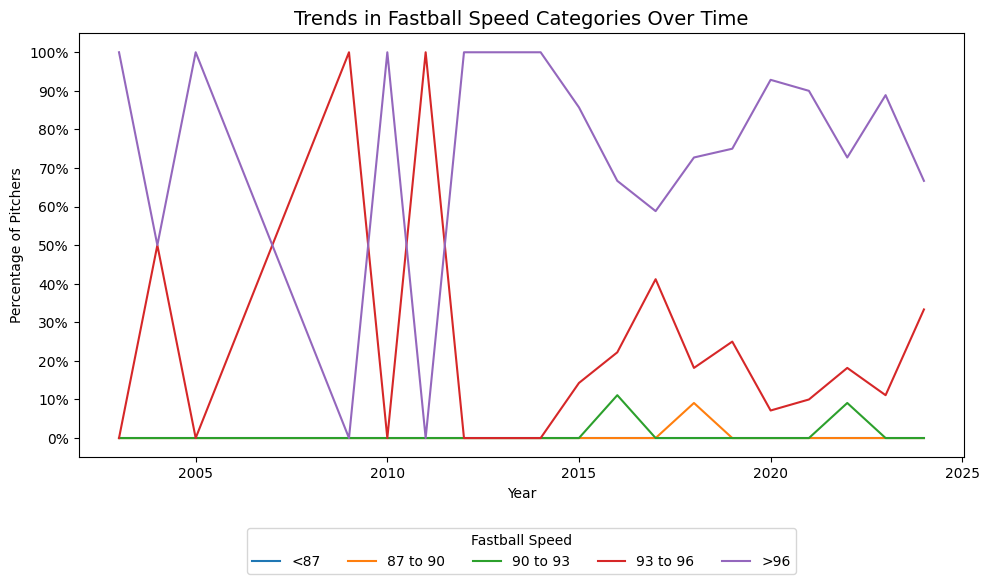

In [13]:
# Plot the line chart for each fastball category over the years
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each category and plot a line
for category in categories:
    ax.plot(grouped_percentage.index, grouped_percentage[category], label=category)

# Add labels and title
ax.set_title('Trends in Fastball Speed Categories Over Time', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Pitchers')

# Add y-axis ticks to reflect percentages (0% to 100%)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([f'{int(x)}%' for x in np.arange(0, 101, 10)])

ax.legend(title="Fastball Speed", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
plt.show()

### Alternative 2: Design
- Original Choice
  - The original chart used different colors in a stacked bar chart to show the percentage of pitchers in different fastball speed groups. Each year is shown as a single bar, with the different speed groups stacked on top of each other.
- Alternative Design
  - A heatmap could be used instead. In a heatmap, each row would represent a year, and each column would represent a fastball speed group. The color in each cell would show how many pitchers were in that speed group for a specific year. Darker colors would mean a higher percentage of pitchers, and lighter colors would mean a lower percentage.
- Effect on Supporting the Claim
  - A heatmap would make it easy to spot overall patterns and trends over time. You’d be able to quickly see if certain speed groups are becoming more common just by looking at the color changes. For example, if more pitchers are throwing faster pitches over the years, the heatmap would show darker colors for the higher speed groups as time goes on. This design supports the idea that pitching speeds are increasing over time.
### Implementation

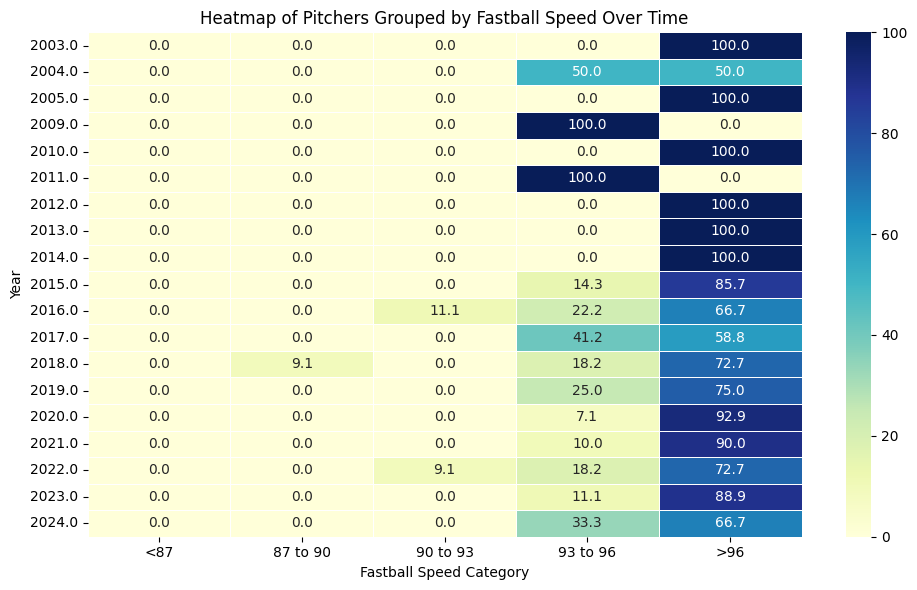

In [14]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 6))

# Use seaborn's heatmap function to plot the percentage data
sns.heatmap(grouped_percentage, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)

plt.title('Heatmap of Pitchers Grouped by Fastball Speed Over Time')
plt.xlabel('Fastball Speed Category')
plt.ylabel('Year')

plt.tight_layout()
plt.show()

## Summary
After replicating the visualization and analyzing the data, my understanding of the original article's claim—about the correlation between fastball velocities and an increased rate of Tommy John surgeries—has deepened. The analysis supports the idea that higher fastball speeds are associated with a higher risk of Tommy John surgery. This finding aligns with the article's claim, reinforcing the notion that increased stress from higher pitch speeds likely contributes to elbow injuries among pitchers.


The replication of the original visualization was largely accurate. I maintained the core elements of the plot while introducing slight adjustments to improve clarity and readability. Despite these minor differences, the replication remained true to the original’s intent, effectively illustrating the relationship between fastball velocity and surgery rates.

The original design provided a straightforward visualization of overall trends, making it effective for quick insights. In contrast, the alternative design I created allowed for a more detailed breakdown of specific velocities and injury rates, making it better suited for analyzing nuanced patterns. The original design is more useful for general audiences, while the alternative is ideal for detailed analysis.

This project raises several follow-up questions, such as: Are there other factors, like pitch type or mechanics, that might contribute to surgery risk? Could a broader dataset encompassing additional variables enhance the analysis? I am also interested in exploring age and pitch count as potential predictors in future studies.

Overall, this project was both challenging and rewarding. It provided valuable experience in data visualization, replication, and interpretation. It also offered insights into how specific pitching metrics might correlate with injury risks, an area I’m interested in exploring further.

## Acknowledgements
We did not receive assistance from any individuals outside our project team. All work was completed collaboratively by Tyler Arista, Ryan Brown, and David Barry.

## License
- Names
- Code
- Public